Positive samples loaded: 126
Negative samples loaded: 164


C:\Users\JellyLiu\AppData\Local\Temp\ipykernel_31784\1166799101.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, color='#2166ac')  # 对角线


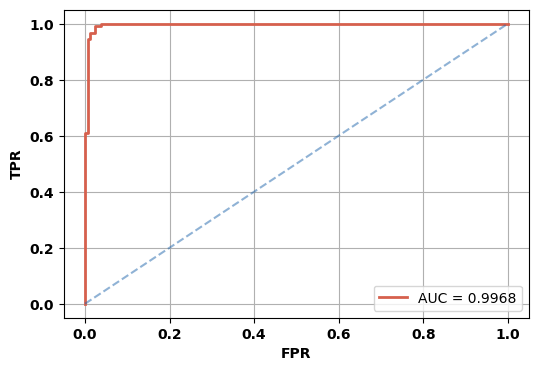

AUC: 0.9968060394889663 EER: 0.028068137824235385 EER threshold: 0.0609022016174901


In [15]:
import os
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

def _sigmoid(x: np.ndarray) -> np.ndarray:
    return 1.0 / (1.0 + np.exp(-x))

# def _load_scores(dir_list):
#     scores = []
#     for base in dir_list:
#         for root, _, files in os.walk(base):
#             for f in files:
#                 if f.lower().endswith('.txt'):
#                     path = os.path.join(root, f)
#                     try:
#                         with open(path, 'r', encoding='utf-8') as fh:
#                             for line in fh:
#                                 line = line.strip()
#                                 if line:
#                                     scores.append(float(line))
#                     except Exception:
#                         continue
#     return np.array(scores, dtype=float)

def _load_scores(dir_path):
    scores = []
    for root, _, files in os.walk(dir_path):
        for f in files:
            if f.lower().endswith('.txt'):
                path = os.path.join(root, f)
                try:
                    with open(path, 'r', encoding='utf-8') as fh:
                        for line in fh:
                            line = line.strip()
                            if line:
                                scores.append(float(line))
                except Exception:
                    continue
    return np.array(scores, dtype=float)    

def compute_metrics(pos_dirs, neg_dirs):
    pos_raw = _load_scores(pos_dirs)
    neg_raw = _load_scores(neg_dirs)
    pos_prob = _sigmoid(pos_raw)
    neg_prob = _sigmoid(neg_raw)
    
    print("Positive samples loaded:", len(pos_prob))
    print("Negative samples loaded:", len(neg_prob))

    y_true = np.concatenate([np.ones_like(pos_prob), np.zeros_like(neg_prob)])
    y_score = np.concatenate([pos_prob, neg_prob])

    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    fnr = 1 - tpr
    tnr = 1 - fpr

    eer_idx = np.argmin(np.abs(fnr - fpr))
    eer = (fnr[eer_idx] + fpr[eer_idx]) / 2.0
    eer_threshold = thresholds[eer_idx]

    return {
        "tpr": tpr,
        "tnr": tnr,
        "fnr": fnr,
        "fpr": fpr,
        "thresholds": thresholds,
        "auc": auc_score,
        "eer": eer,
        "eer_threshold": eer_threshold,
    }
COLOARS = ['#2166ac','#d6604d']

def plot_roc(fpr, tpr, auc_score, title="ROC Curve"):
    # plt.figure()
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='#d6604d', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, color='#2166ac')  # 对角线
    #加粗坐标轴标签
    plt.xlabel("FPR", fontweight='bold')
    plt.ylabel("TPR", fontweight='bold')
    plt.xticks(np.arange(0, 1.1, 0.2),fontweight="bold")
    plt.yticks(np.arange(0, 1.1, 0.2),fontweight="bold")
    
    plt.rcParams['font.serif'] = 'Times New Roman'
    # plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    # os.makedirs("./WG", exist_ok=True)
    plt.savefig("./WG/result_roc.png", dpi=300, bbox_inches="tight")
    plt.show()



# 示例使用（请替换为实际路径列表）
pos_path = r"Z:\dataset\accelerometer_audio\AccSeal\WG\paper_test_dataset_true"
# pos_files = ["/file1/", "/file2/"]
# pos_dirs = [os.path.join(pos_path, f) for f in pos_files]

neg_path = r"Z:\dataset\accelerometer_audio\AccSeal\WG\paper_test_dataset_false"
# neg_files = ["/file3/", "/file4/"]
# neg_dirs = [os.path.join(neg_path, f) for f in neg_files]


res = compute_metrics(pos_path, neg_path)
plot_roc(res["fpr"], res["tpr"], res["auc"])
print("AUC:", res["auc"], "EER:", res["eer"], "EER threshold:", res["eer_threshold"])

In [9]:
#calculate pos result
pos_path = r"Z:\dataset\accelerometer_audio\AccSeal\WG\paper_test_dataset_true"
pos_scores = _load_scores(pos_path)
pos_probs = _sigmoid(pos_scores)

# threshold = res["eer_threshold"]
threshold = 0.5

pos_predictions = (pos_probs >= threshold).astype(int)
pos_accuracy = pos_predictions.mean()

print(f"Positive sample accuracy: {pos_accuracy:.4f} at threshold {threshold:.6f}")


Positive sample accuracy: 0.9444 at threshold 0.500000


In [ ]:
# calculate neg result
neg_scores = _load_scores(neg_path)
neg_probs = _sigmoid(neg_scores)

threshold = 0.5

neg_predictions = (neg_probs >= threshold).astype(int)
neg_accuracy = (neg_predictions == 0).mean()

print(f"Negative sample accuracy: {neg_accuracy:.4f} at threshold {threshold:.6f}")

Negative sample accuracy: 0.9939 at threshold 0.500000


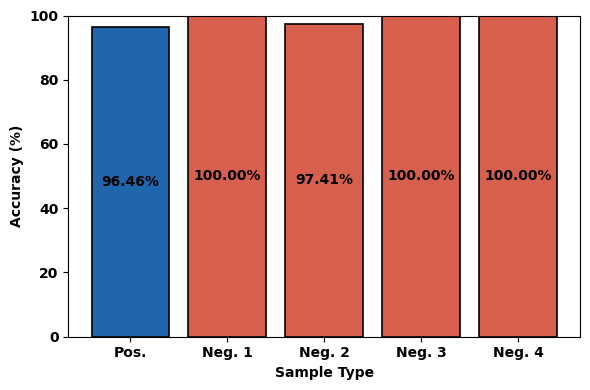

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 百分比柱状图
categories = ["Pos.", "Neg. 1", "Neg. 2", "Neg. 3", "Neg. 4"]
percentages = np.array([0.9646, 1, 0.9741, 1, 1]) * 100.0
# COLOARS = ["#96D1DF", "#4E74B3", "#944d55", "#EB6E68"]
COLOARS = ['#d6604d', '#2166ac',]

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, percentages, color= COLOARS, edgecolor="black")
plt.ylabel("Accuracy (%)", fontweight="bold")
plt.yticks(np.arange(0, 101, 20),fontweight="bold")
plt.ylim(0, 100)

# plt.rcParams['font.size'] = 24
plt.rcParams['font.serif'] = 'Times New Roman'

# 在柱中间显示数值
# 横坐标字体加粗
# for b in bars:
#     b.set_edgecolor("black")
#     b.set_linewidth(1.2)
for cat, bar, pct in zip(categories, bars, percentages):
    bar.set_color("#2166ac" if cat.lower().startswith("pos") else  "#d6604d")
    bar.set_edgecolor("black")
    bar.set_linewidth(1.2)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f"{pct:.2f}%", ha="center", va="center", fontweight="bold")

plt.xticks(fontweight="bold")
plt.xlabel("Sample Type", fontweight="bold")

plt.tight_layout()
# os.makedirs("./WG", exist_ok=True)
plt.savefig("D:/CodeSpace/PROJECT/UltraPrint/data/paper_fig/result_bar.png", dpi=300, bbox_inches="tight")
plt.show()